# MLP - Multi-Layer Perceptron NN

### Prerequisities
1. [tensorflow](https://www.tensorflow.org/)
2. [numpy](https://numpy.org/)

## History

When american psychologist *Frank Rosenblatt* came with the first model of called *perceptron*. People were hyped, but the problem with perceptron was, that it could be applied (successfuly) only on linear separable sets. ([wikipedia: Linear separability](https://en.wikipedia.org/wiki/Linear_separability))

In 1969 *Marvin L. Minsky* and *Seymour A. Papert* came with so called *XOR problem*:

| input 1  | input 2  | output (XOR)  |
| -------- |:--------:| :-----------: |
| 0        | 0        | 0             |
| 0        | 1        | 1             |
| 1        | 0        | 1             |
| 1        | 1        | 0             |

You can see from logic truth table, that our function can only result in two values $0, 1$.

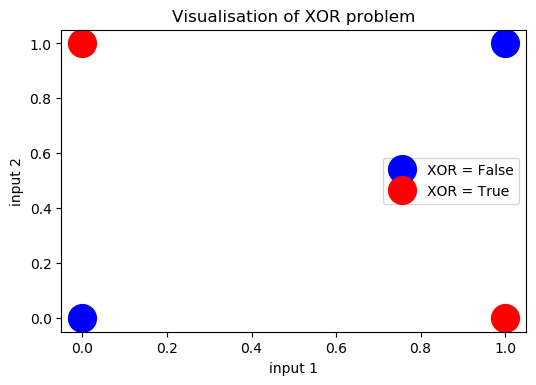

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(dpi=100)
plt.plot([0, 1], [0, 1], 'ob', ms=20, label="XOR = False")
plt.plot([1, 0], [0, 1], 'or', ms=20, label="XOR = True")
plt.legend()
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.title("Visualisation of XOR problem")
plt.show()

Now try to draw a straight line, which will separet blue and red points. Quickly, you will get feeling it is not possible. This is simple example of property of two sets called *linear separabilty* mentioned above. 

Even at these times, people knew, that those problems could be solved by *Multy-Layer Perceptron neural networks (MLP)*. To have some intuitive insight to that, if I cant separate sets by one line, maybe I can separate those sets by mutliple lines, those lines create some kind of buckets and every bucket will be connected to some class.

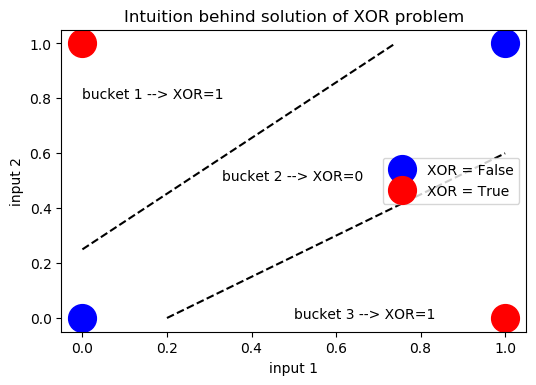

In [2]:
plt.figure(dpi=100)
plt.plot([0, 1], [0, 1], 'ob', ms=20, label="XOR = False")
plt.plot([1, 0], [0, 1], 'or', ms=20, label="XOR = True")
plt.plot([0.2, 1.],[0, 0.6], "k--")
plt.plot([0, 0.74],[0.25, 1.0], "k--")

plt.text(0.0, 0.8, "bucket 1 --> XOR=1")
plt.text(0.33, 0.5, "bucket 2 --> XOR=0")
plt.text(0.5, 0.0, "bucket 3 --> XOR=1")

plt.legend()
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.title("Intuition behind solution of XOR problem")
plt.show()

[![IMAGE ALT TEXT HERE](http://img.youtube.com/vi/aircAruvnKk/0.jpg)](http://www.youtube.com/watch?v=aircAruvnKk)

## Implementation

In [3]:
import tensorflow as tf
import numpy as np

c:\users\adamp\onedrive\dokumenty\projects - jupyter\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\adamp\onedrive\dokumenty\projects - jupyter\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\adamp\onedrive\dokumenty\projects - jupyter\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\u

In [4]:
def analyze_classifier(sess, i, w1, b1, w2, b2, XOR_X, XOR_T, last=False):
    """ Function analazises MLP model during training process
    
    Args:
        sess (tf.session): tensorflow session
        i (int): epoch of training
        w1 (tensor): weights of first layer
        b1 (tensor): biases of first layer
        w2 (tensor): weights of second layer
        b2 (tensor): biases of second layer
        XOR_X (list): XOR inputs
        XOR_T (list): XOR targets
        last(bool, optional): last epoch of training --> True
    
    Returns:
        None
    """
    print('\nEpoch %i' % i)
    print('Output \n%s' % sess.run(prediction,
                                     feed_dict={input_vec: XOR_X,
                                                target_vec: XOR_T}))
    print('Loss = %s' % sess.run(loss,
                                    feed_dict={input_vec: XOR_X,
                                               target_vec: XOR_T}))
    # Visualize classification boundary
    if last:
        xs = np.linspace(0, 1)
        ys = np.linspace(0, 1)
    else:
        xs = np.linspace(-5, 5)
        ys = np.linspace(-5, 5)
    
    pred_classes = []
    for x in xs:
        for y in ys:
            pred_class = sess.run(prediction,
                                  feed_dict={input_vec: [[x, y]]})
            pred_classes.append((x, y, pred_class.argmax()))
    xs_p, ys_p = [], []
    xs_n, ys_n = [], []
    for x, y, c in pred_classes:
        if c == 0:
            xs_n.append(x)
            ys_n.append(y)
        else:
            xs_p.append(x)
            ys_p.append(y)
    plt.plot(xs_p, ys_p, 'ro', xs_n, ys_n, 'bo')
    plt.show()

In [5]:
# The training data
XOR_X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # Features
XOR_Y = [0, 1, 1, 0]  # Class labels
XOR_T = [[0, 1],
         [1, 0],
         [1, 0],
         [0, 1]] # Class labels in One Hot Bit format

In [6]:
n_input = 2
n_hidden = 2
n_classes = 2

# tf Graph variables
w_hidden = tf.Variable(tf.random_uniform([n_input, n_hidden], -1, 1), name="Weights1")
w_out = tf.Variable(tf.random_uniform([n_hidden, n_classes], -1, 1), name="Weights2")
b_hidden = tf.Variable(tf.zeros([n_hidden]), name="Biases1")
b_out = tf.Variable(tf.zeros([n_classes]), name="Biases2")

# tf Graph input
input_vec = tf.placeholder("float", [None, n_input])
target_vec = tf.placeholder("float", [None, n_classes])


# Create model
def neural_net(input_vec):
    # Hidden fully connected layer with 2 neurons
    hidden_layer_in = tf.matmul(input_vec, w_hidden) + b_hidden
    hidden_layer_activation = tf.sigmoid(hidden_layer_in)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(hidden_layer_activation, w_out) + b_out
    return out_layer

In [8]:
logits = neural_net(input_vec)
prediction = tf.nn.softmax(logits)

loss_fcn = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=target_vec)
loss = tf.reduce_sum(loss_fcn)
train_fcn = tf.train.AdamOptimizer(0.1)
train = train_fcn.minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.




Epoch 0
Output 
[[0.6318314  0.36816862]
 [0.6894162  0.31058374]
 [0.6446728  0.35532716]
 [0.700062   0.29993805]]
Loss = 3.014316


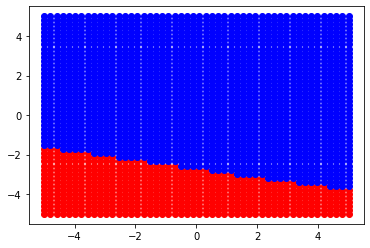


Epoch 10
Output 
[[0.47909012 0.52090985]
 [0.50983614 0.49016383]
 [0.48479512 0.51520485]
 [0.5153513  0.4846487 ]]
Loss = 2.7742038


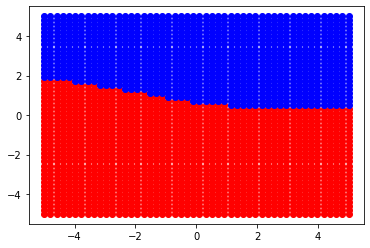


Epoch 20
Output 
[[0.48778206 0.51221794]
 [0.5127505  0.4872494 ]
 [0.48589957 0.51410043]
 [0.5064697  0.49353033]]
Loss = 2.7648954


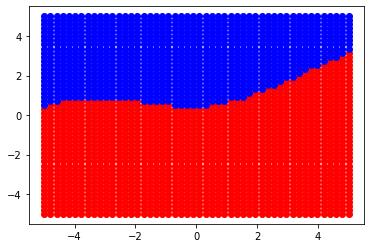


Epoch 30
Output 
[[0.48197955 0.5180204 ]
 [0.50957936 0.49042067]
 [0.48126516 0.5187348 ]
 [0.49599493 0.5040051 ]]
Loss = 2.7484162


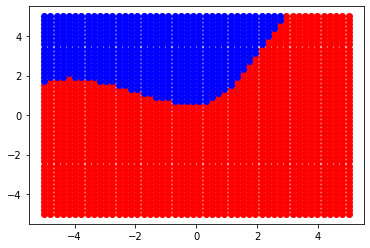


Epoch 40
Output 
[[0.46182284 0.53817713]
 [0.5294374  0.47056255]
 [0.49265975 0.5073403 ]
 [0.5126541  0.4873458 ]]
Loss = 2.6822255


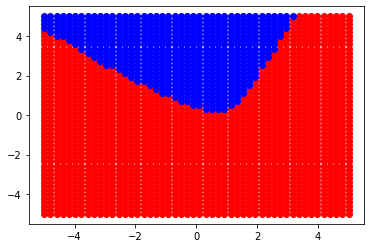


Epoch 50
Output 
[[0.3188194  0.6811806 ]
 [0.56157684 0.4384232 ]
 [0.5072459  0.49275416]
 [0.5427476  0.45725247]]
Loss = 2.4222136


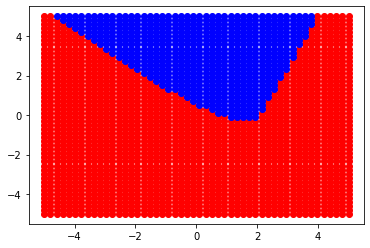


Epoch 60
Output 
[[0.13703854 0.86296153]
 [0.6703345  0.32966542]
 [0.5767796  0.4232203 ]
 [0.61356986 0.38643017]]
Loss = 2.0484629


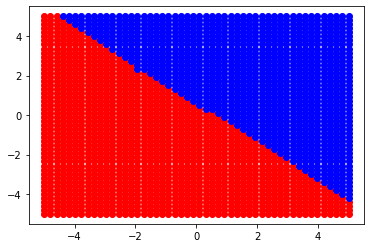


Epoch 70
Output 
[[0.06818573 0.9318143 ]
 [0.7668609  0.23313908]
 [0.60104865 0.3989513 ]
 [0.6149053  0.38509467]]
Loss = 1.799417


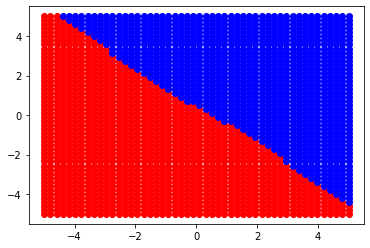


Epoch 80
Output 
[[0.04557468 0.9544253 ]
 [0.8663773  0.13362272]
 [0.5479855  0.4520145 ]
 [0.5635711  0.43642896]]
Loss = 1.6207168


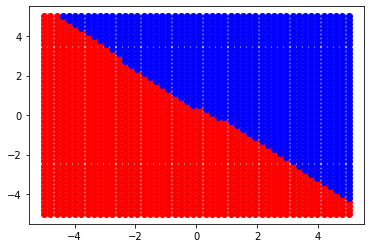


Epoch 90
Output 
[[0.03928877 0.96071124]
 [0.92339826 0.07660173]
 [0.5008804  0.4991196 ]
 [0.5102798  0.48972014]]
Loss = 1.525085


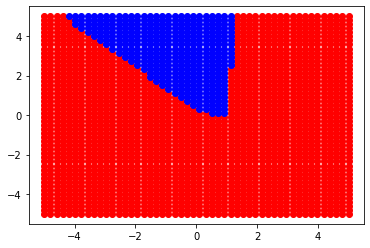


Epoch 100
Output 
[[0.03841837 0.9615816 ]
 [0.9497643  0.05023565]
 [0.513172   0.486828  ]
 [0.510841   0.48915893]]
Loss = 1.4729292


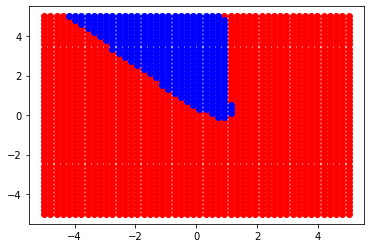


Epoch 110
Output 
[[0.03239074 0.9676092 ]
 [0.9583619  0.04163804]
 [0.5271298  0.47287014]
 [0.5028761  0.49712387]]
Loss = 1.4146812


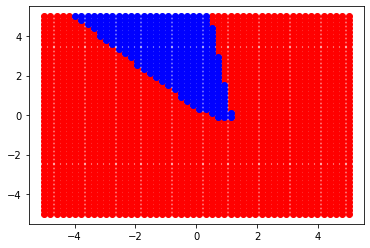


Epoch 120
Output 
[[0.02835683 0.9716431 ]
 [0.9583653  0.04163467]
 [0.7267859  0.27321407]
 [0.49411783 0.50588226]]
Loss = 1.0718677


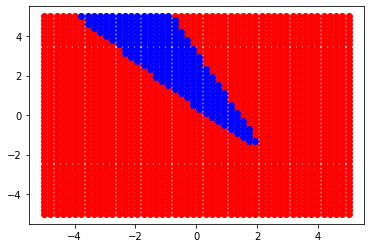


Epoch 130
Output 
[[0.01156651 0.98843354]
 [0.8321261  0.16787396]
 [0.9235178  0.07648217]
 [0.23048756 0.7695124 ]]
Loss = 0.5369686


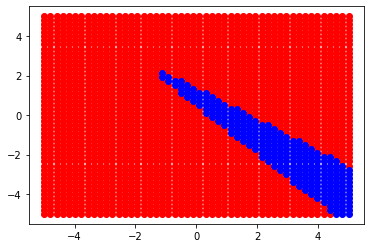


Epoch 140
Output 
[[0.01479133 0.98520875]
 [0.9405951  0.05940491]
 [0.9619207  0.03807936]
 [0.1253877  0.87461233]]
Loss = 0.24894214


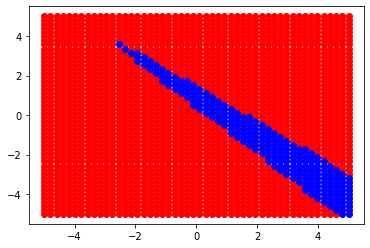


Epoch 150
Output 
[[0.01965573 0.9803443 ]
 [0.9742546  0.0257454 ]
 [0.9684986  0.03150137]
 [0.05927831 0.9407217 ]]
Loss = 0.13905026


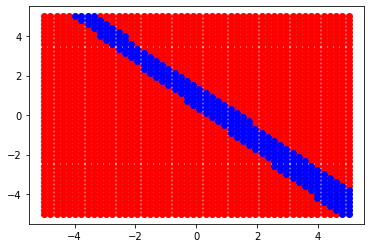


Epoch 160
Output 
[[0.01849619 0.98150384]
 [0.9854473  0.01455275]
 [0.9804899  0.01951005]
 [0.04252111 0.95747894]]
Loss = 0.09648349


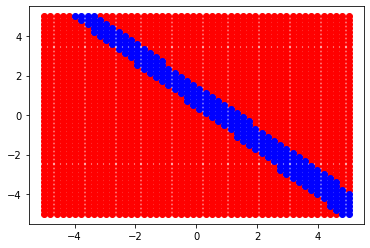


Epoch 170
Output 
[[0.0127997  0.98720026]
 [0.9861466  0.01385338]
 [0.9833475  0.01665249]
 [0.02904099 0.970959  ]]
Loss = 0.07309633


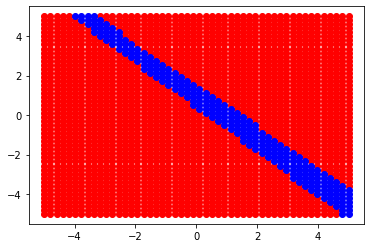


Epoch 180
Output 
[[0.00990687 0.9900932 ]
 [0.987773   0.01222702]
 [0.9870331  0.01296685]
 [0.02404651 0.97595346]]
Loss = 0.059650615


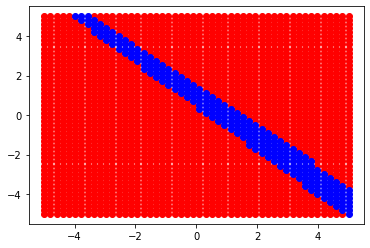


Epoch 190
Output 
[[0.00847115 0.99152887]
 [0.98943275 0.01056726]
 [0.9895238  0.01047616]
 [0.02098764 0.97901237]]
Loss = 0.05087307


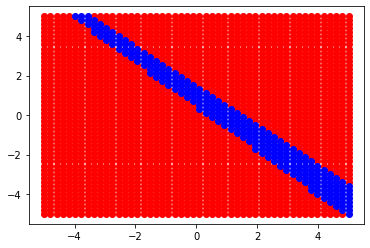


Epoch 200
Output 
[[0.00751556 0.9924844 ]
 [0.99054116 0.00945887]
 [0.99085367 0.0091463 ]
 [0.01806114 0.98193884]]
Loss = 0.044462513


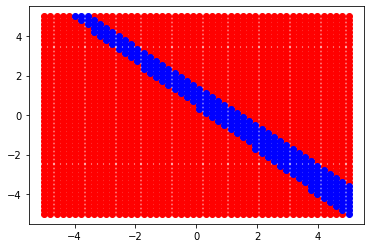

In [14]:
# Start training
init = tf.global_variables_initializer()

with tf.Session() as sess:    
    sess.run(init)
    for i in range(2001):
        sess.run(train, feed_dict={input_vec: XOR_X, target_vec: XOR_T})
        if i % 10 == 0:
            analyze_classifier(sess, i, w_hidden, b_hidden, w_out, b_out, XOR_X, XOR_T)
            loss_val = sess.run(loss, feed_dict={input_vec: XOR_X, target_vec: XOR_T})
            if loss_val < 0.01:
                analyze_classifier(sess, i, w_hidden, b_hidden, w_out, b_out, XOR_X, XOR_T, True)
                break